In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from datetime import datetime


In [4]:
df = pd.read_csv('Yu-Group Data.csv')

In [6]:
df.columns

Index(['Unnamed: 0', 'countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName',
       'StateName', 'State', 'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE',
       'CensusRegionName', 'CensusDivisionName',
       'Rural-UrbanContinuumCode2013', 'PopulationEstimate2018',
       'PopTotalMale2017', 'PopTotalFemale2017', 'FracMale2017',
       'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010',
       'CensusPopulation2010', 'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale

In [11]:
npi = ['stay at home', '>50 gatherings','>500 gatherings', 'public schools', 'restaurant dine-in','entertainment/gym', 'federal guidelines', 'foreign travel ban']
npi_df = df[npi]

In [13]:
npi_df.fillna(0)

,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban
0,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0
1,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0
2,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0
3,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0
4,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0
...,...,...,...,...,...,...,...,...
3239,737509.0,737509.0,737509.0,737507.0,737504.0,737509.0,737500.0,737495.0
3240,0.0,0.0,0.0,737500.0,737499.0,737499.0,737500.0,737495.0
3241,0.0,0.0,0.0,737500.0,737499.0,737499.0,737500.0,737495.0
3242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
datetime.fromordinal(int(npi_df['stay at home'][0]))

datetime.datetime(2020, 4, 4, 0, 0)

In [20]:
from collections import Counter

In [21]:
Counter(npi_df['federal guidelines'])

Counter({737500.0: 3219,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1})

In [22]:
fed_date = 737500

In [53]:
datetime.fromordinal(737501)

datetime.datetime(2020, 3, 17, 0, 0)

In [48]:
(npi_df['stay at home'] - fed_date).min()

3.0

In [60]:
(npi_df['>50 gatherings'] - fed_date).min()

5.82864703936487

In [44]:
(npi_df['>500 gatherings'] - fed_date).min()

-5.0

In [43]:
(npi_df['restaurant dine-in'] - fed_date).min()

-4.0

In [42]:
(npi_df['entertainment/gym'] - fed_date).min()

-4.0

In [41]:
(npi_df['public schools'] - fed_date).min()

-1.0

In [68]:
df.columns

Index(['Unnamed: 0', 'countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName',
       'StateName', 'State', 'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE',
       'CensusRegionName', 'CensusDivisionName',
       'Rural-UrbanContinuumCode2013', 'PopulationEstimate2018',
       'PopTotalMale2017', 'PopTotalFemale2017', 'FracMale2017',
       'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010',
       'CensusPopulation2010', 'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale

In [84]:
dfmaster = pd.read_csv('master_yu.csv')
dfmaster.head()

,Unnamed: 0,death_rate,Unnamed: 0.1,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,10001,20.162419,313,10,1,Kent,DE,Delaware,39.087654,-75.573876,...,737508.0,737500,737496,737496.0,737500,737495,0.7268,17.66,0.0,52966.0
1,10003,16.269320,314,10,3,New Castle,DE,Delaware,39.583358,-75.655191,...,737508.0,737500,737496,737496.0,737500,737495,0.3761,NaN,NaN,NaN
2,10005,37.507741,315,10,5,Sussex,DE,Delaware,38.665735,-75.406689,...,737508.0,737500,737496,737496.0,737500,737495,0.4019,21.79,0.0,65373.0
3,11001,43.276794,316,11,1,Washington,DC,District Of Columbia,38.910787,-77.034099,...,737509.0,737500,737500,737500.0,737500,737495,0.5965,NaN,NaN,NaN
4,12001,1.852154,317,12,1,Alachua,FL,Florida,29.669178,-82.357751,...,737501.0,737500,737504,737504.0,737500,737495,0.4729,29.84,12780.0,89514.0


In [82]:
scores=[]
for i in range(len(dfmaster)):
    indiv_score = []
    if(dfmaster['>50 gatherings'][i] - fed_date < 0):
        indiv_score.append(1)
    else:
        indiv_score.append(0)
    if(dfmaster['>500 gatherings'][i] - fed_date < 0):
        indiv_score.append(1)
    else:
        indiv_score.append(0)
    if(dfmaster['restaurant dine-in'][i] - fed_date < 0):
        indiv_score.append(1)
    else:
        indiv_score.append(0)
    if(dfmaster['entertainment/gym'][i] - fed_date < 0):
        indiv_score.append(1)
    else:
        indiv_score.append(0)
    if(dfmaster['public schools'][i] - fed_date < 0):
        indiv_score.append(1)
    else:
        indiv_score.append(0)
    if(sum(indiv_score) > 0):
        scores.append(1)
    else:
        scores.append(0)

In [83]:
Counter(scores)

Counter({1: 707, 0: 2118})

In [92]:
dfmaster['Score'] = scores
dfmaster=dfmaster.fillna(0)

In [86]:
dfmaster.columns

Index(['Unnamed: 0', 'death_rate', 'Unnamed: 0.1', 'STATEFP', 'COUNTYFP',
       'CountyName', 'StateName', 'State', 'lat', 'lon', 'POP_LATITUDE',
       'POP_LONGITUDE', 'CensusRegionName', 'CensusDivisionName',
       'Rural-UrbanContinuumCode2013', 'PopulationEstimate2018',
       'PopTotalMale2017', 'PopTotalFemale2017', 'FracMale2017',
       'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010',
       'CensusPopulation2010', 'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',

In [132]:
estimators = ['death_rate', 'PopulationEstimate2018', 'PopulationEstimate65+2017','PopulationDensityperSqMile2010', 'MedianAge2010', 'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#Hospitals', '#ICU_beds','SVIPercentile', 'HPSAShortage', 'HPSAServedPop', 'HPSAUnderservedPop', 'dem_to_rep_ratio']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(dfmaster[estimators], dfmaster['Score'], test_size=0.3)

In [141]:
RFmod = RandomForestClassifier(max_depth=8, n_estimators=10, max_features=4)
RFmod.fit(X_train,np.ravel(y_train))
RFmod.score(X_test,y_test),RFmod.score(X_train,y_train)

(0.8089622641509434, 0.8973191704602934)

In [143]:
yhat = RFmod.predict(X_test)
confusion_matrix(y_test,yhat)

array([[609,  17],
       [145,  77]])

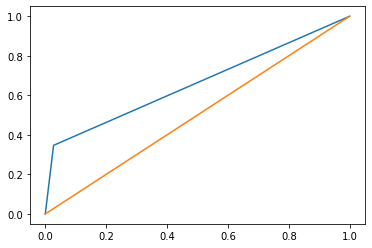

In [144]:
fpr, tpr, thresholds = roc_curve(y_test, yhat)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)